**Nama         : Nur Ishmawati**

**Kode Peserta : PYTN-KS19-08**

**Program      : Python for Data Science**

**ASSIGNMENT 2**

## Data Preparation

In [1]:
# Import library yang dibutuhkan
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mengambil dataset nyc-rolling-sales di folder dataset dan didefinisikan sebagai variabel df_NYC

df_NYC = pd.read_csv('nyc-rolling-sales.csv')

## Explore Data

In [3]:
# Menampilkan semua kolom dalam DataFrame
# Menampilkan 6 baris paling atas

pd.set_option("display.max.columns", None)
df_NYC.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
# Menampilkan 6 baris paling bawah

df_NYC.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


BOROUGH berisi kode wilayah properti berada, yaitu:
- Manhattan (1)
- Bronx (2)
- Brooklyn (3)
- Queens (4)
- Staten Island (5)

In [5]:
# Mengetahui jumlah total baris dan kolom dalam kumpulan data menggunakan .shape

df_NYC.shape #(row, column)

(84548, 22)

Dataset ini memiliki 84548 baris data dengan 22 kolom

In [6]:
df_NYC.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [7]:
# Menghapus beberapa kolom yang tidak digunakan dan memiliki banyak nilai NaN menggunakan drop()

df_mn = df_NYC.drop(['Unnamed: 0', 'EASE-MENT','APARTMENT NUMBER'], axis=1, inplace=False)
df_mn

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [8]:
# Memeriksa data yang duplikat pada setiap kolom

sum(df_mn.duplicated(df_mn.columns))

765

In [9]:
# Menghapus data duplikat

df_mn = df_mn.drop_duplicates(df_mn.columns, keep='last')
sum(df_mn.duplicated(df_mn.columns))

0

In [10]:
# Mengetahui kolom dan tipe data yang sesuai, dan menemukan apakah kolom tersebut berisi nilai null atau tidak menggunakan info

df_mn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         83783 non-null  int64 
 1   NEIGHBORHOOD                    83783 non-null  object
 2   BUILDING CLASS CATEGORY         83783 non-null  object
 3   TAX CLASS AT PRESENT            83783 non-null  object
 4   BLOCK                           83783 non-null  int64 
 5   LOT                             83783 non-null  int64 
 6   BUILDING CLASS AT PRESENT       83783 non-null  object
 7   ADDRESS                         83783 non-null  object
 8   ZIP CODE                        83783 non-null  int64 
 9   RESIDENTIAL UNITS               83783 non-null  int64 
 10  COMMERCIAL UNITS                83783 non-null  int64 
 11  TOTAL UNITS                     83783 non-null  int64 
 12  LAND SQUARE FEET                83783 non-null

In [11]:
# Merubah beberapa kolom ke tipe data yang sesuai

df_mn['TAX CLASS AT TIME OF SALE'] = df_mn['TAX CLASS AT TIME OF SALE'].astype('category')
df_mn['TAX CLASS AT PRESENT'] = df_mn['TAX CLASS AT PRESENT'].astype('category')
df_mn['LAND SQUARE FEET'] = pd.to_numeric(df_mn['LAND SQUARE FEET'], errors='coerce')
df_mn['GROSS SQUARE FEET']= pd.to_numeric(df_mn['GROSS SQUARE FEET'], errors='coerce')
df_mn['SALE DATE'] = pd.to_datetime(df_mn['SALE DATE'], errors='coerce')
df_mn['SALE PRICE'] = pd.to_numeric(df_mn['SALE PRICE'], errors='coerce')
df_mn['BOROUGH'] = df_mn['BOROUGH'].astype('category')

In [12]:
# Memeriksa missing values pada setiap kolom

df_mn.columns[df_mn.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

In [13]:
df_mn.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [14]:
# Mengetahui persentase missing value

miss=df_mn.isnull().sum()/len(df_mn)*100
miss=miss[miss>0]
miss.sort_values(inplace=True)
miss

SALE PRICE           16.919900
LAND SQUARE FEET     31.097001
GROSS SQUARE FEET    32.685628
dtype: float64

Informasi tersebut menunjukkan bahwa terdapat missing value, yaitu sebanyak 16.92% atau 14561 pada SALE PRICE, 31.1% atau 26252 pada LAND SQUARE FEET, 32.69% atau 27612 pada GROSS SQUARE FEET.

Hal yang dapat dilakukan untuk mengatasi missing value pilihan, yaitu:
- Menghapus baris nilai yang hilang, atau
- mengisinya dengan nilai rata-rata(mean), median(nilai tengah), atau relasi lainnya

Untuk mengatasi missing values pada kolom LSF dan GSF dengan persentase missing value di atas 20%, maka akan digunakan nilai rata-rata untuk mengganti missing value pada masing-masing kolom.

In [15]:
df_mn['LAND SQUARE FEET']=df_mn['LAND SQUARE FEET'].fillna(df_mn['LAND SQUARE FEET'].mean())
df_mn['GROSS SQUARE FEET']=df_mn['GROSS SQUARE FEET'].fillna(df_mn['GROSS SQUARE FEET'].mean())

In [16]:
# Memeriksa kembali missing values pada setiap kolom

df_mn.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

Kolom LAND SQUARE FEET dan GROSS SQUARE FEET sudah tidak memiliki missing values. Selama missing values pada SALE PRICE belum mencapai 20% dari keseluruhan data, maka selanjutnya missing values pada kolom sale price akan dihapus menggunakan dropna()

In [17]:
df_mn.dropna(inplace=True)

In [18]:
# Memeriksa kembali missing values pada setiap kolom

df_mn.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Sudah tidak ada missing values pada data. Selanjutnya, akan dibuat box plot untuk melihat outliers pada kolom sale price yang akan digunakan untuk analisis lebih lanjut.

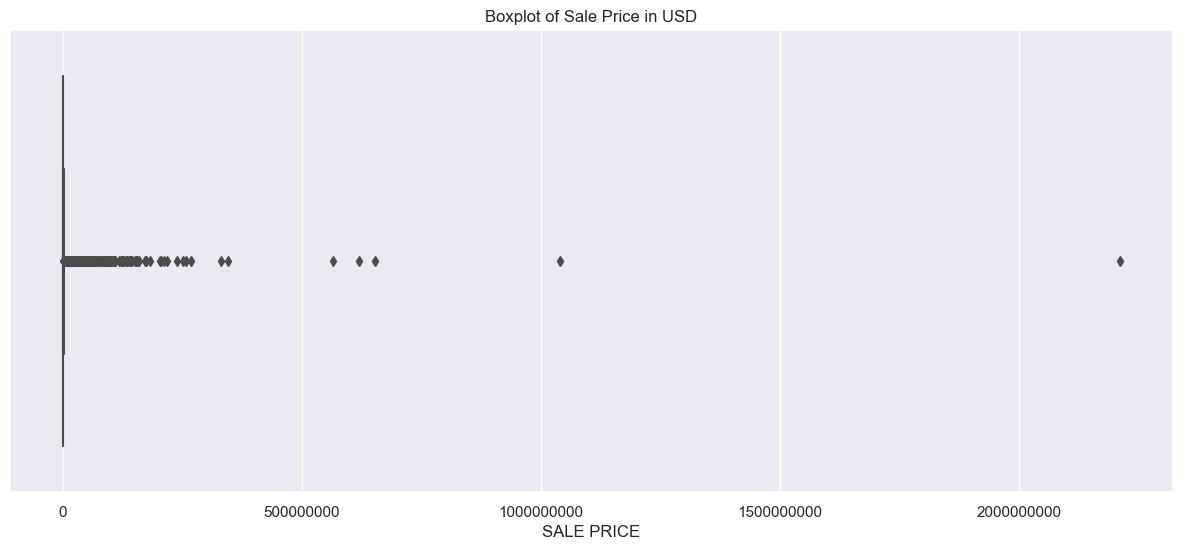

In [19]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=df_mn)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Sale Price in USD')
plt.show()

<Axes: xlabel='SALE PRICE', ylabel='Density'>

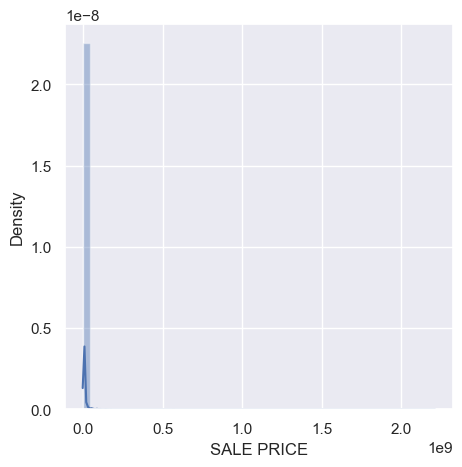

In [20]:
sns.distplot(df_mn['SALE PRICE'])

<function matplotlib.pyplot.show(close=None, block=None)>

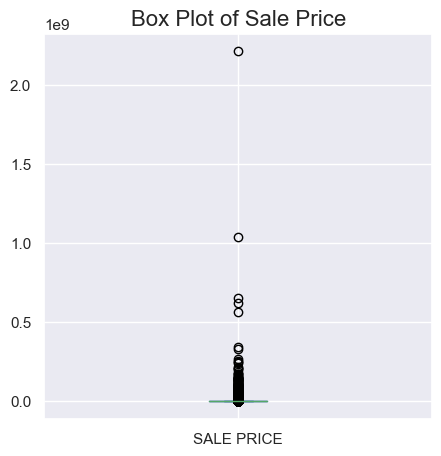

In [21]:
df_mn['SALE PRICE'].plot(kind='box')
plt.title('Box Plot of Sale Price', size=16)
plt.show

Text(0.5, 1.0, 'Box Plot of Sale Price')

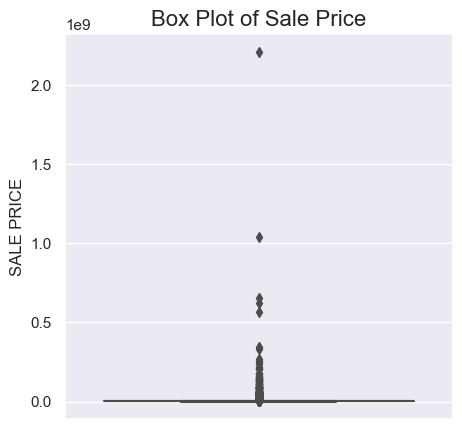

In [22]:
sns.boxplot(y=df_mn['SALE PRICE']).set_title('Box Plot of Sale Price', size=16)

In [23]:
# Menghitung nilai Q1, Q3, dan IQR dari kolom Sale Price

Q1 = df_mn['SALE PRICE'].quantile(0.25)
Q3 = df_mn['SALE PRICE'].quantile(0.75)
IQR = Q3 - Q1

print('Q1 = ', Q1)
print('Q3 = ', Q3)
print('IQR SALE PRICE = ', IQR)

Q1 =  230000.0
Q3 =  950000.0
IQR SALE PRICE =  720000.0


Dikatakan sebagai outlier jika suatu data lebih besar dari Q3 setidaknya 1.5 kali rentang interkuartil (IQR) atau lebih kecil dari Q1 setidaknya 1.5 kali rentang interkuartil

In [24]:
# Memeriksa Outlier

min_IQR = Q1 - (1.5*IQR)
max_IQR = Q3 + (1.5*IQR)

outliers_upper = df_mn['SALE PRICE'][(df_mn['SALE PRICE'] > max_IQR)]
outliers_lower = df_mn['SALE PRICE'][(df_mn['SALE PRICE'] < min_IQR)]
jumlah_outlier =  outliers_lower.size + outliers_upper.size

print("Batas Bawah Outlier: ", min_IQR)
print("Batas Atas Outlier: ", max_IQR)
print("Total Outlier: ", jumlah_outlier)

Batas Bawah Outlier:  -850000.0
Batas Atas Outlier:  2030000.0
Total Outlier:  6663


In [25]:
persentase_outlier = (jumlah_outlier / df_mn['SALE PRICE'].size) * 100
print("% Outlier: ", persentase_outlier)

% Outlier:  9.572313129426638


<Axes: xlabel='SALE PRICE', ylabel='Density'>

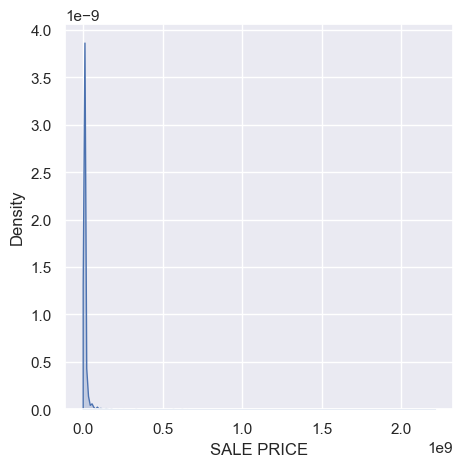

In [26]:
sns.kdeplot(df_mn['SALE PRICE'], fill=True)

In [27]:
# Menghapus data outliers

print('Jumlah baris data sebelum data outlier di-drop: ',df_mn.shape[0])
df_mn = df_mn.loc[df_mn['SALE PRICE'] < max_IQR]
df_mn = df_mn.loc[df_mn['SALE PRICE'] > min_IQR]

print('Jumlah baris data setelah data outlier di-drop: ',df_mn.shape[0])

Jumlah baris data sebelum data outlier di-drop:  69607
Jumlah baris data setelah data outlier di-drop:  62943


<Axes: xlabel='SALE PRICE', ylabel='Density'>

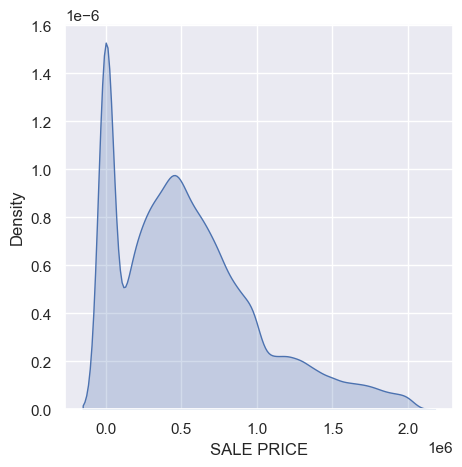

In [28]:
sns.kdeplot(df_mn['SALE PRICE'], fill=True)

<Axes: xlabel='SALE PRICE', ylabel='Density'>

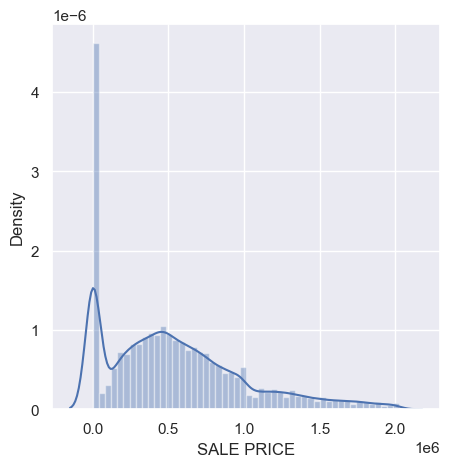

In [29]:
sns.distplot(df_mn['SALE PRICE'])

Mengganti nilai pada kolom BOROUGH dengan 1 = Manhattan, 2 = Bronx, 3 = Brooklyn, 4 = Queens, dan 5 = Staten Island.

In [30]:
df_mn['BOROUGH']= df_mn['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df_mn.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",10009,0,0,0,3854.481179,3894.415813,1920,2,C6,1.0,2016-09-06
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",10009,0,0,0,3854.481179,3894.415813,1920,2,C6,499000.0,2017-03-10
14,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 3A",10009,0,0,0,3854.481179,3894.415813,1920,2,C6,10.0,2017-04-28
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3RD STREET, 5A",10009,0,0,0,3854.481179,3894.415813,1920,2,C6,529500.0,2017-06-09
16,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 2E",10009,0,0,0,3854.481179,3894.415813,1920,2,C6,423000.0,2017-07-14


In [31]:
df_mn.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,62943.000000,62943.000000,62943.000000,62943.000000,62943.000000,62943.000000,6.294300e+04,6.294300e+04,62943.000000,6.294300e+04
mean,4479.195621,343.909807,10802.304418,1.484820,0.111116,1.615986,3.136880e+03,2.888346e+03,1806.808605,5.469063e+05
std,3445.246122,630.139926,1192.621187,10.792963,9.086840,14.180186,2.153322e+04,2.003732e+04,508.783817,4.588583e+05
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1508.000000,21.000000,10314.000000,0.000000,0.000000,0.000000,1.833000e+03,1.216000e+03,1920.000000,1.900000e+05
50%,3929.000000,48.000000,11213.000000,1.000000,0.000000,1.000000,2.700000e+03,2.176000e+03,1940.000000,4.780000e+05
75%,6541.500000,239.500000,11354.000000,2.000000,0.000000,2.000000,3.854481e+03,3.894416e+03,1965.000000,7.950000e+05
max,16319.000000,9024.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.026317e+06


In [32]:
# Menghilangkan nilai 0

df_mn['YEAR BUILT'].replace(0, np.nan, inplace=True)
df_mn['TOTAL UNITS'].replace(0, np.nan, inplace=True)
df_mn['SALE PRICE'].replace(0, np.nan, inplace=True)
df_mn['LAND SQUARE FEET'].replace(0, np.nan, inplace=True)
df_mn['GROSS SQUARE FEET'].replace(0, np.nan, inplace=True)

In [33]:
# Memastikan nilai 0 sudah tidak ada

print("Nilai 0 pada YEAR BUILT       : ",df_mn[df_mn['YEAR BUILT']==0]['YEAR BUILT'].count())
print("Nilai 0 pada TOTAL UNIT       : ",df_mn[df_mn['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("Nilai 0 pada SALE PRICE       : ",df_mn[df_mn['SALE PRICE']==0]['SALE PRICE'].count())
print("Nilai 0 pada LAND SQUARE FEET : ",df_mn[df_mn['LAND SQUARE FEET']==0]['LAND SQUARE FEET'].count())
print("Nilai 0 pada GROSS SQUARE FEET: ",df_mn[df_mn['GROSS SQUARE FEET']==0]['GROSS SQUARE FEET'].count())

Nilai 0 pada YEAR BUILT       :  0
Nilai 0 pada TOTAL UNIT       :  0
Nilai 0 pada SALE PRICE       :  0
Nilai 0 pada LAND SQUARE FEET :  0
Nilai 0 pada GROSS SQUARE FEET:  0


Nilai 0 telah terganti dengan NaN. Selanjutnya hapus missing values dengan dropna

In [34]:
df_mn.dropna(inplace=True)

## Measure of Central Tendency: Mean

In [35]:
Ingin mengetahui rata-rata dari harga penjualan di setiap wilayah?

Object `wilayah` not found.


In [36]:
mean_mh = statistics.mean(df_mn[df_mn['BOROUGH'] == 'Manhattan']['SALE PRICE'])
mean_brx = statistics.mean(df_mn[df_mn['BOROUGH'] == 'Bronx']['SALE PRICE'])
mean_brklyn = statistics.mean(df_mn[df_mn['BOROUGH'] == 'Brooklyn']['SALE PRICE'])
mean_qns = statistics.mean(df_mn[df_mn['BOROUGH'] == 'Queens']['SALE PRICE'])
mean_sttis = statistics.mean(df_mn[df_mn['BOROUGH'] == 'Staten Island']['SALE PRICE'])
print("Mean dari harga penjualan di wilayah Manhattan    : ", "{:.3f}".format(mean_mh))
print("Mean dari harga penjualan di wilayah Bronx        : ", "{:.3f}".format(mean_brx))
print("Mean dari harga penjualan di wilayah Brooklyn     : ", "{:.3f}".format(mean_brklyn))
print("Mean dari harga penjualan di wilayah Queens       : ", "{:.3f}".format(mean_qns))
print("Mean dari harga penjualan di wilayah Staten Island: ", "{:.3f}".format(mean_sttis))

Mean dari harga penjualan di wilayah Manhattan    :  1068211.472
Mean dari harga penjualan di wilayah Bronx        :  490544.788
Mean dari harga penjualan di wilayah Brooklyn     :  816745.302
Mean dari harga penjualan di wilayah Queens       :  657439.118
Mean dari harga penjualan di wilayah Staten Island:  484717.275


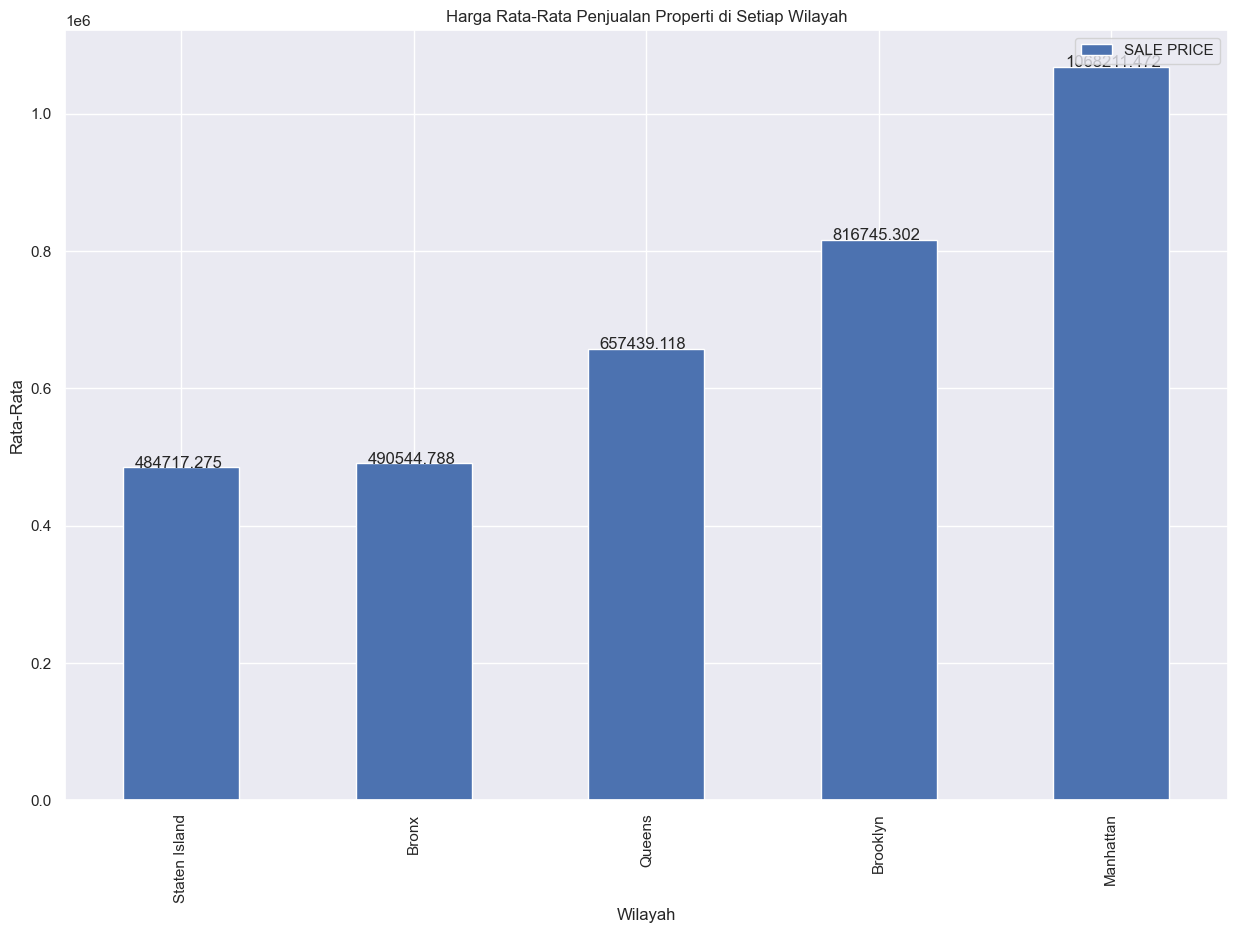

In [37]:
mean_SP_Borough = df_mn[['BOROUGH','SALE PRICE']].groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True)
mean_SP_Borough.plot(kind = 'bar', figsize=(15,10))

plt.title('Harga Rata-Rata Penjualan Properti di Setiap Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Rata-Rata')
plt.text(3.8, mean_mh, "{:.3f}".format(mean_mh))
plt.text(2.8, mean_brklyn, "{:.3f}".format(mean_brklyn))
plt.text(1.8, mean_qns, "{:.3f}".format(mean_qns))
plt.text(0.8, mean_brx, "{:.3f}".format(mean_brx))
plt.text(-0.2, mean_sttis, "{:.3f}".format(mean_sttis))

plt.show()

Berdasarkan output perhitungan dan grafik di atas dapat disimpulkan bahwa wilayah Manhattan memiliki harga rata-rata penjualan tertinggi dibandingkan keempat wilayah lain dan wilayah state island memiliki harga rata-rata penjualan terendah berbeda tipis dengan wilayah bronx.

## Measure of Central Tendency: Median

Ingin mengetahui median dari nilai Sale Price berdasarkan Tax Class at Present

In [38]:
median_sp = df_mn.pivot_table(index='TAX CLASS AT PRESENT', values='SALE PRICE', aggfunc=np.median)
median_sp

,SALE PRICE
TAX CLASS AT PRESENT,
1,565000.0
1A,340000.0
1B,473163.0
1C,861693.5
2,845000.0
2A,950000.0
2B,1162500.0
2C,565854.0
4,700000.0


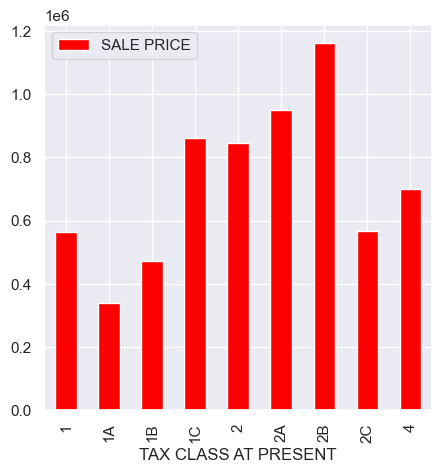

In [39]:
median_sp.plot(kind='bar', color='red')
plt.show()

Nilai median tertinggi terdapat pada tax class 2B dan terendah pada tax 1A

## Measure of Central Tendency: Modus

Ingin mengetahui kategori yang sering muncul pada kolom borough, neighborhood, dan build class category

In [40]:
modus_Borough            = statistics.mode(df_mn['BOROUGH'])
modus_Neighborhood       = statistics.mode(df_mn['NEIGHBORHOOD'])
modus_BuildClassCategory = statistics.mode(df_mn['BUILDING CLASS CATEGORY'])
print("Modus Borough                 :", modus_Borough)
print("Modus Neighborhood            :", modus_Neighborhood)
print("Modus Building Class Category :", modus_BuildClassCategory )

Modus Borough                 : Queens
Modus Neighborhood            : FLUSHING-NORTH
Modus Building Class Category : 01 ONE FAMILY DWELLINGS                    


Ingin mengetahui kategori kelas bangunan apakah yang sering terjual di setiap wilayah

In [41]:
sold_mh = df_mn['BOROUGH'] == 'Manhattan'
sold_brx = df_mn['BOROUGH'] == 'Bronx'
sold_brklyn = df_mn['BOROUGH'] == 'Brooklyn'
sold_qns = df_mn['BOROUGH'] == 'Queens'
sold_sttis = df_mn['BOROUGH'] == 'Staten Island'

print('Buildings often sold in Manhattan     :', statistics.mode(df_mn[sold_mh]['BUILDING CLASS CATEGORY']))
print('Buildings often sold in Bronx         :', statistics.mode(df_mn[sold_brx]['BUILDING CLASS CATEGORY']))
print('Buildings often sold in Brooklyn      :', statistics.mode(df_mn[sold_brklyn]['BUILDING CLASS CATEGORY']))
print('Buildings often sold in Queens        :', statistics.mode(df_mn[sold_qns]['BUILDING CLASS CATEGORY']))
print('Buildings often sold in Staten Island :', statistics.mode(df_mn[sold_sttis]['BUILDING CLASS CATEGORY']))

Buildings often sold in Manhattan     : 13 CONDOS - ELEVATOR APARTMENTS            
Buildings often sold in Bronx         : 02 TWO FAMILY DWELLINGS                    
Buildings often sold in Brooklyn      : 02 TWO FAMILY DWELLINGS                    
Buildings often sold in Queens        : 01 ONE FAMILY DWELLINGS                    
Buildings often sold in Staten Island : 01 ONE FAMILY DWELLINGS                    


1. Kategori kelas bangunan yang sering terjual di wilayah Manhattan adalah 13 CONDOS - ELEVATOR APARTMENTS

2. Kategori kelas bangunan yang sering terjual di wilayah Bronx adalah 02 TWO FAMILY DWELLINGS

3. Kategori kelas bangunan yang sering terjual di wilayah Brooklyn adalah 02 TWO FAMILY DWELLINGS

4. Kategori kelas bangunan yang sering terjual di wilayah Queens adalah 01 ONE FAMILY DWELLINGS

5. Kategori kelas bangunan yang sering terjual di wilayah Staten Island adalah 01 ONE FAMILY DWELLINGS

## Measure of Spread: Range

Ingin mengetahui berapa rentang luas dalam Gross Square Feet (GSF) dan Land Square Feet (LSF)

In [42]:
range_GSF = np.ptp(df_mn['GROSS SQUARE FEET'])
range_LSF = np.ptp(df_mn['LAND SQUARE FEET'])
print(f"Nilai Min Gross Square Feet: {df_mn['GROSS SQUARE FEET'].min()}")
print(f"Nilai Max Gross Square Feet: {df_mn['GROSS SQUARE FEET'].max()}")
print(f"Nilai Min Land Square Feet : {df_mn['LAND SQUARE FEET'].min()}")
print(f"Nilai Max Land Square Feet : {df_mn['LAND SQUARE FEET'].max()}")
print("Range dari Gross Square Feet:", range_GSF)
print("Range dari Land Square Fee  :", range_LSF)

Nilai Min Gross Square Feet: 120.0
Nilai Max Gross Square Feet: 3750565.0
Nilai Min Land Square Feet : 200.0
Nilai Max Land Square Feet : 4228300.0
Range dari Gross Square Feet: 3750445.0
Range dari Land Square Fee  : 4228100.0


## Measure of Spread: Variance

Ingin mengetahui berapa nilai varians dari SALE PRICE, LAND SQUARE FEET, dan GROSS SQUARE FEET

In [43]:
var_SP = statistics.variance(df_mn['SALE PRICE'])
var_LSF = statistics.variance(df_mn['LAND SQUARE FEET'])
var_GSF = statistics.variance(df_mn['GROSS SQUARE FEET'])

print("Varian dari Sale Price        : ", "{:.3f}".format(var_SP))
print("Varian dari Land Square Feet  : ", "{:.3f}".format(var_LSF))
print("Varian dari Gross Square Feet : ", "{:.3f}".format(var_GSF))

Varian dari Sale Price        :  171087785498.771
Varian dari Land Square Feet  :  856527705.724
Varian dari Gross Square Feet :  553910498.614


## Measure of Spread: Standard Deviation

Ingin mengetahui berapa nilai standar deviasi dari SALE PRICE, LAND SQUARE FEET, dan GROSS SQUARE FEET

In [44]:
std_SP = statistics.stdev(df_mn['SALE PRICE'])
std_LSF = statistics.stdev(df_mn['LAND SQUARE FEET'])
std_GSF = statistics.stdev(df_mn['GROSS SQUARE FEET'])
print("Standar Deviasi dari Sale Price        : ", "{:.3f}".format(std_SP))
print("Standar Deviasi dari Land Square Feet  : ", "{:.3f}".format(std_LSF))
print("Standar Deviasi dari Gross Square Feet : ", "{:.3f}".format(std_GSF))

Standar Deviasi dari Sale Price        :  413627.593
Standar Deviasi dari Land Square Feet  :  29266.495
Standar Deviasi dari Gross Square Feet :  23535.303


## Probability Distribution

Probability distribution dari Sale Price di setiap wilayah

[Text(0.5, 0, 'price'),
 Text(0, 0.5, 'Kemungkinan'),
 Text(0.5, 1.0, 'Distribusi Harga Jual di Wilayah Manhattan')]

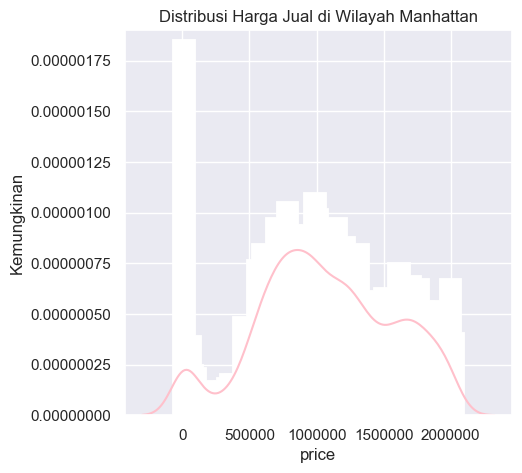

In [45]:
dist_mhttn = df_mn[df_mn['BOROUGH'] == 'Manhattan']['SALE PRICE']

ax = sns.distplot(dist_mhttn,
                  kde=True,
                  bins=100,
                  color='pink',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.ticklabel_format(style='plain')
ax.set(xlabel='price', ylabel='Kemungkinan', title='Distribusi Harga Jual di Wilayah Manhattan')

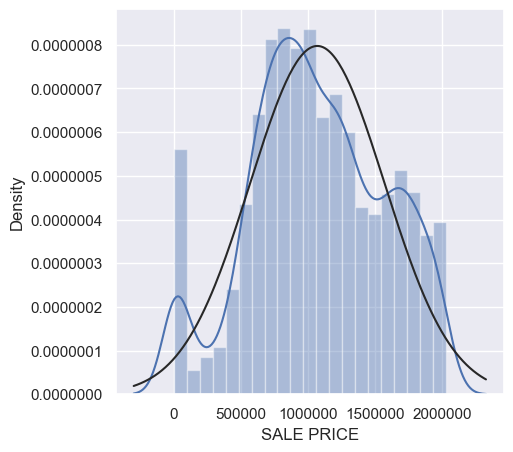

In [46]:
from scipy.stats import norm
x = pd.Series(dist_mhttn.values, name="SALE PRICE")
ax = sns.distplot(x, fit=norm, kde=True)
ax.ticklabel_format(style='plain')

[Text(0.5, 0, 'price'),
 Text(0, 0.5, 'Kemungkinan'),
 Text(0.5, 1.0, 'Distribusi Harga Jual di Wilayah Bronx')]

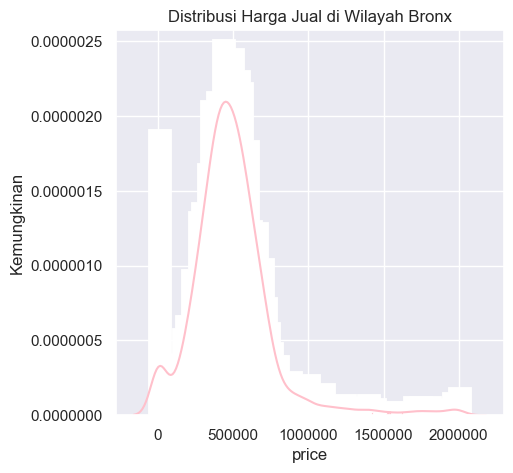

In [47]:
dist_brx = df_mn[df_mn['BOROUGH'] == 'Bronx']['SALE PRICE']

ax = sns.distplot(dist_brx,
                  kde=True,
                  bins=100,
                  color='pink',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.ticklabel_format(style='plain')
ax.set(xlabel='price', ylabel='Kemungkinan', title='Distribusi Harga Jual di Wilayah Bronx')

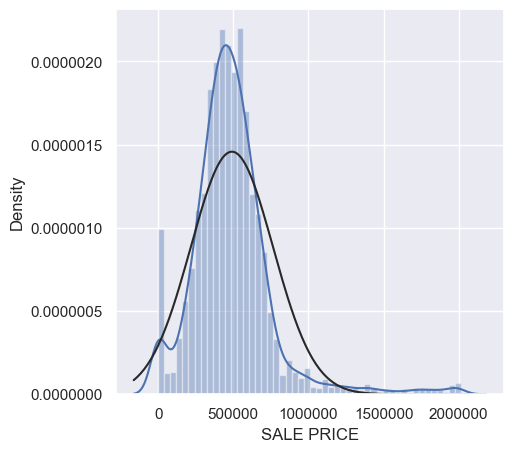

In [48]:
from scipy.stats import norm
x = pd.Series(dist_brx.values, name="SALE PRICE")
ax = sns.distplot(x, fit=norm, kde=True)
ax.ticklabel_format(style='plain')

[Text(0.5, 0, 'price'),
 Text(0, 0.5, 'Kemungkinan'),
 Text(0.5, 1.0, 'Distribusi Harga Jual di Wilayah Brooklyn')]

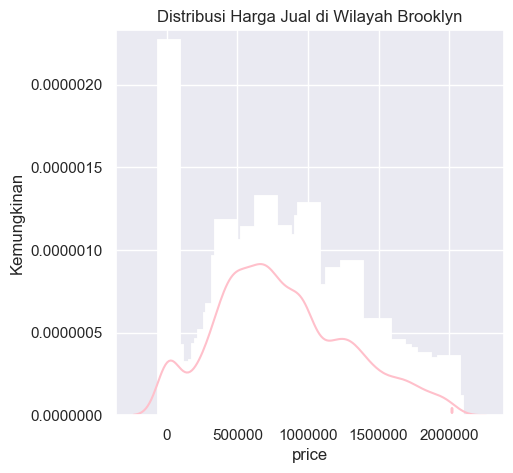

In [49]:
dist_brklyn = df_mn[df_mn['BOROUGH'] == 'Brooklyn']['SALE PRICE']

ax = sns.distplot(dist_brklyn,
                  kde=True,
                  bins=100,
                  color='pink',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.ticklabel_format(style='plain')
ax.set(xlabel='price', ylabel='Kemungkinan', title='Distribusi Harga Jual di Wilayah Brooklyn')

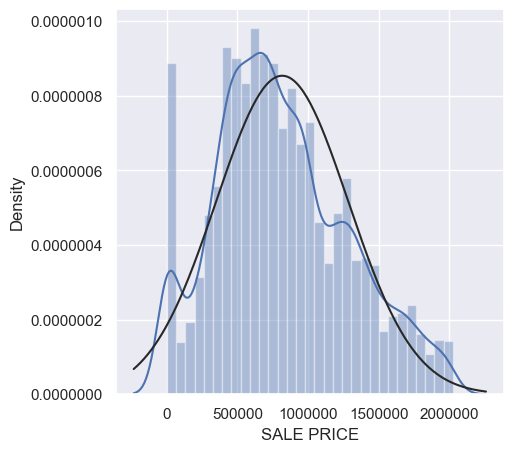

In [50]:
from scipy.stats import norm
x = pd.Series(dist_brklyn.values, name="SALE PRICE")
ax = sns.distplot(x, fit=norm, kde=True)
ax.ticklabel_format(style='plain')

[Text(0.5, 0, 'price'),
 Text(0, 0.5, 'Kemungkinan'),
 Text(0.5, 1.0, 'Distribusi Harga Jual di Wilayah Queens')]

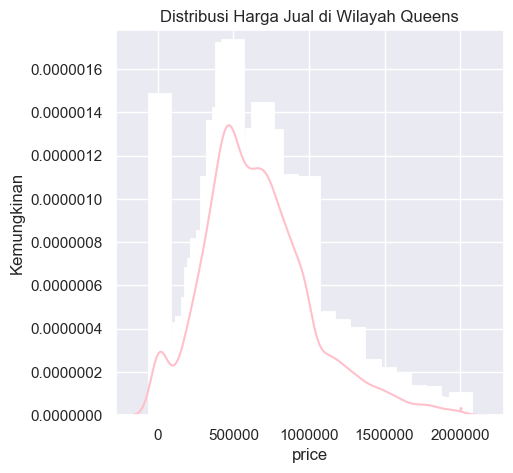

In [51]:
dist_qns = df_mn[df_mn['BOROUGH'] == 'Queens']['SALE PRICE']

ax = sns.distplot(dist_qns,
                  kde=True,
                  bins=100,
                  color='pink',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.ticklabel_format(style='plain')
ax.set(xlabel='price', ylabel='Kemungkinan', title='Distribusi Harga Jual di Wilayah Queens')

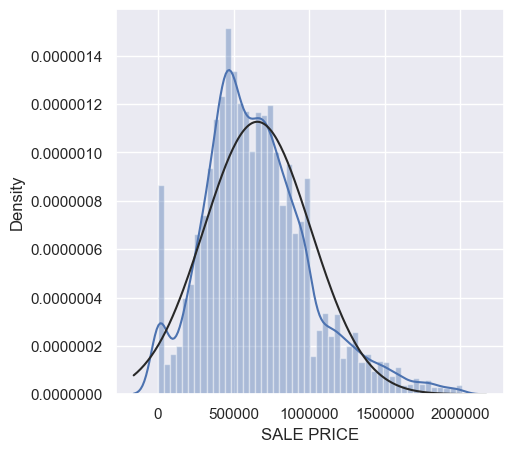

In [52]:
from scipy.stats import norm
x = pd.Series(dist_qns.values, name="SALE PRICE")
ax = sns.distplot(x, fit=norm, kde=True)
ax.ticklabel_format(style='plain')

[Text(0.5, 0, 'price'),
 Text(0, 0.5, 'Kemungkinan'),
 Text(0.5, 1.0, 'Distribusi Harga Jual di Wilayah Staten Island')]

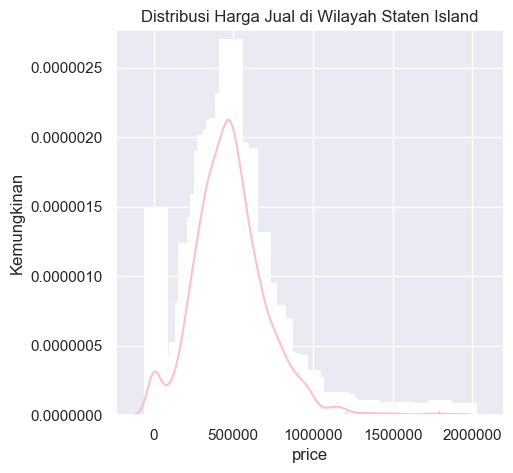

In [53]:
dist_si = df_mn[df_mn['BOROUGH'] == 'Staten Island']['SALE PRICE']

ax = sns.distplot(dist_si,
                  kde=True,
                  bins=100,
                  color='pink',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.ticklabel_format(style='plain')
ax.set(xlabel='price', ylabel='Kemungkinan', title='Distribusi Harga Jual di Wilayah Staten Island')

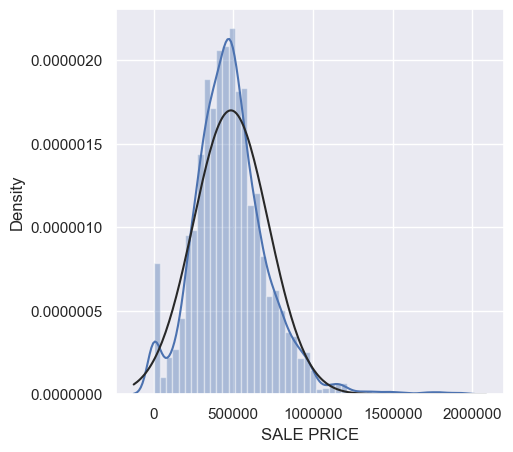

In [54]:
from scipy.stats import norm
x = pd.Series(dist_si.values, name="SALE PRICE")
ax = sns.distplot(x, fit=norm, kde=True)
ax.ticklabel_format(style='plain')

## Confidence Intervals

Ingin mengetahui rata-rata sale price di salah satu wilayah yaitu, Brooklyn.

In [55]:
CI = df_mn.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
pd.options.display.float_format = "{:.3f}".format
CI

SALE PRICE                  
                     mean        std   size
BOROUGH                                    
Manhattan     1068211.472 500407.472   3138
Bronx          490544.788 273851.476   3274
Brooklyn       816745.302 467260.222   7476
Queens         657439.118 354079.981  12682
Staten Island  484717.275 234865.276   5686

In [56]:
# Mengekstrak parameter yang diperlukan

mean_sp_brooklyn = CI.iloc[2,0]
sd = CI.iloc [2,1]
n = CI.iloc [2,2]         
z = 1.96 # z-score untuk confidence level 95%

Menghitung standard error menggunakan formula untuk standard error dari mean

In [57]:
se = sd / np.sqrt(n)

In [58]:
lcb = mean_sp_brooklyn - z * se
ucb = mean_sp_brooklyn + z * se

In [59]:
print(f"Artinya rata-rata sebenarnya dari sale price di wilayah Brooklyn nilainya berkisar antara {lcb} dan {ucb}")

Artinya rata-rata sebenarnya dari sale price di wilayah Brooklyn nilainya berkisar antara 806153.2466819551 dan 827337.3571168679


## Hypothesis Testing

In [60]:
sp1 = df_mn[df_mn['BOROUGH'] == 'Manhattan']['SALE PRICE']

from scipy.stats import shapiro
stat1, p1 = shapiro(sp1)
print('stat1=%.3f, p1=%.3f' % (stat1, p1))
if p1 > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat1=0.979, p1=0.000
Probably not Gaussian


In [61]:
sp2 = df_mn[df_mn['BOROUGH'] == 'Bronx']['SALE PRICE']

from scipy.stats import shapiro
stat2, p2 = shapiro(sp2)
print('stat2=%.3f, p2=%.3f' % (stat2, p2))
if p2 > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat2=0.850, p2=0.000
Probably not Gaussian


In [62]:
sp3 = df_mn[df_mn['BOROUGH'] == 'Brooklyn']['SALE PRICE']

from scipy.stats import shapiro
stat3, p3 = shapiro(sp3)
print('stat3=%.3f, p3=%.3f' % (stat3, p3))
if p3 > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat3=0.976, p3=0.000
Probably not Gaussian


In [63]:
sp4 = df_mn[df_mn['BOROUGH'] == 'Queens']['SALE PRICE']

from scipy.stats import shapiro
stat4, p4 = shapiro(sp4)
print('stat4=%.3f, p4=%.3f' % (stat4, p4))
if p4 > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat4=0.965, p4=0.000
Probably not Gaussian


In [64]:
sp5 = df_mn[df_mn['BOROUGH'] == 'Staten Island']['SALE PRICE']

from scipy.stats import shapiro
stat5, p5 = shapiro(sp5)
print('stat5=%.3f, p5=%.3f' % (stat5, p5))
if p5 > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat5=0.945, p5=0.000
Probably not Gaussian


Berdasarkan pengujian hipotesis, didapatkan di setiap wilayah nilai p-value < 0.05 sehingga sampel dinyatakan bahwa tidak berdistribusi normal/Gaussian.

## Kesimpulan

Berdasarkan output-output dari data yang diolah, maka dapat ditarik beberapa kesimpulan yang dapat dilihat pada beberapa poin berikut:
1. Wilayah Manhattan memiliki harga rata-rata penjualan tertinggi dibandingkan keempat wilayah lain dan wilayah state island memiliki harga rata-rata penjualan terendah berbeda tipis dengan wilayah bronx.
2. Nilai median tertinggi terdapat pada tax class 2B dan terendah pada tax 1A.
3. Kategori kelas bangunan yang sering terjual di wilayah Manhattan adalah 13 CONDOS - ELEVATOR APARTMENTS, di wilayah Bronx dan Brooklyn adalah 02 TWO FAMILY DWELLINGS, serta di wilayah Queens dan Staten Island adalah 01 ONE FAMILY DWELLINGS.
4. Berdasarkan pengujian hipotesis, didapatkan di setiap wilayah nilai p-value < 0.05 sehingga sampel dinyatakan bahwa tidak berdistribusi normal/Gaussian.